In [1]:
import pandas as pd
from dataset import Dataset
from dataread import Dataread
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style("whitegrid")
plt.rcParams['font.family'] = 'NanumGothic'
plt.rcParams['axes.unicode_minus'] = False

ds = Dataset()
dr = Dataread()
JSON_KEY_PATH = "./sprintda05-soomin.json"


In [2]:
master_table = pd.read_csv('./dataset/master_last_v4.csv')
point_table = pd.read_csv('./dataset/use_point_within_signup_N_days.csv')

In [27]:
point_table

,user_id,sign_up_date,first_vote_date,first_point_use_date,first_point_use_amount,vote_sameday_signup,point_used_within_signup_3days
0,849436,2023-04-28 02:54:59.981972,2023-04-28 12:27:49,2023-04-28 17:44:51,-300.0,1,1
1,847375,2023-04-26 11:32:36.470049,2023-04-28 12:28:46,2023-04-29 09:09:36,-300.0,0,1
2,849438,2023-04-28 02:56:02.571340,2023-04-28 12:29:29,2023-04-30 13:37:52,-300.0,1,1
3,849479,2023-04-28 03:27:32.406440,2023-04-28 12:29:52,2023-04-28 14:31:21,-300.0,1,1
4,849441,2023-04-28 02:56:56.323854,2023-04-28 12:30:06,NaN,NaN,1,0
...,...,...,...,...,...,...,...
4840,1577440,2023-06-29 08:36:52.982230,2023-06-29 09:03:48,2023-06-30 05:36:03,-200.0,1,1
4841,1577436,2023-06-29 08:03:16.561688,2023-07-05 06:29:21,NaN,NaN,0,0
4842,857659,2023-04-30 07:48:39.390053,2023-07-11 09:11:26,2023-04-30 09:50:19,-300.0,0,1
4843,1578095,2023-07-11 13:25:58.942235,2023-07-11 13:29:13,NaN,NaN,1,0


In [93]:
user_table = point_table[['user_id','first_vote_date','sign_up_date']].copy()
time_diff = (pd.to_datetime(user_table['first_vote_date'])) - (pd.to_datetime(user_table['sign_up_date']))
user_table['seconds_to_vote'] = time_diff.dt.total_seconds()
user_table['hours_to_vote'] = time_diff.dt.total_seconds() // 3600
user_table['mins_to_vote'] = time_diff.dt.total_seconds() // 60

In [94]:
user_table.to_csv('./dataset/time_to_first_vote.csv', index=False, encoding='utf-8')

In [95]:
user_table

,user_id,first_vote_date,sign_up_date,seconds_to_vote,hours_to_vote,mins_to_vote
0,849436,2023-04-28 12:27:49,2023-04-28 02:54:59.981972,3.436902e+04,9.0,572.0
1,847375,2023-04-28 12:28:46,2023-04-26 11:32:36.470049,1.761695e+05,48.0,2936.0
2,849438,2023-04-28 12:29:29,2023-04-28 02:56:02.571340,3.440643e+04,9.0,573.0
3,849479,2023-04-28 12:29:52,2023-04-28 03:27:32.406440,3.253959e+04,9.0,542.0
4,849441,2023-04-28 12:30:06,2023-04-28 02:56:56.323854,3.438968e+04,9.0,573.0
...,...,...,...,...,...,...
4840,1577440,2023-06-29 09:03:48,2023-06-29 08:36:52.982230,1.615018e+03,0.0,26.0
4841,1577436,2023-07-05 06:29:21,2023-06-29 08:03:16.561688,5.127644e+05,142.0,8546.0
4842,857659,2023-07-11 09:11:26,2023-04-30 07:48:39.390053,6.225767e+06,1729.0,103762.0
4843,1578095,2023-07-11 13:29:13,2023-07-11 13:25:58.942235,1.940578e+02,0.0,3.0


In [ ]:
accounts_user = ds.votes.accounts_user()
accounts_user = accounts_user.iloc[1:]

,id,is_superuser,is_staff,gender,point,friend_id_list,is_push_on,created_at,block_user_id_list,hide_user_id_list,ban_status,report_count,alarm_count,pending_chat,pending_votes,group_id
1,831962,0,0,F,2248,"[833025, 832642, 982531, 879496, 838541, 83752...",1,2023-03-29 05:18:56.162368,[],[],N,253,40878,5499,110,12.0
2,832151,0,0,M,1519,"[838785, 982531, 882567, 879496, 838541, 83649...",0,2023-03-29 12:56:34.989468,[],[],N,0,37,0,47,1.0
3,832340,0,0,F,57,"[841345, 982531, 838785, 963714, 882567, 83252...",1,2023-03-29 12:56:35.020790,[],[],N,0,19,0,21,1.0
4,832520,0,0,M,1039,"[874050, 849763, 874212, 844297, 838541, 84004...",0,2023-03-29 12:56:35.049311,[],[],N,0,29,0,15,12.0
5,832614,0,0,M,1048,"[838541, 833041, 832151, 837806, 1437874, 1142...",1,2023-03-29 12:56:35.064406,[],[],N,0,28,0,14,12.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
677080,1583729,0,0,M,300,[],1,2024-05-08 21:54:33.621408,[],[],N,0,0,0,0,32442.0
677081,1583730,0,0,M,420,"[1109507, 1110921, 1111072, 1110054, 1108393, ...",0,2024-05-09 07:08:11.001817,[],[],N,0,1,0,0,43949.0
677082,1583731,0,0,M,300,"[1583732, 1583673]",1,2024-05-09 07:22:19.186439,[],[],N,0,1,0,0,18640.0
677083,1583732,0,0,F,300,"[1583673, 1583730, 1583731]",1,2024-05-09 07:22:38.387553,[],[],N,0,0,0,0,18640.0


In [38]:
accounts_user['day'] = pd.to_datetime(accounts_user['created_at']).dt.floor('D')

/tmp/ipykernel_1371686/1816230859.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  accounts_user['day'] = pd.to_datetime(accounts_user['created_at']).dt.floor('D')


In [43]:
signup_user = accounts_user.groupby('day')['id'].count().reset_index(name='signup_count')

In [45]:
signup_user['cumsum_signup_count'] = signup_user['signup_count'].cumsum()
signup_user

,day,signup_count,cumsum_signup_count
0,2023-03-29,10,10
1,2023-03-31,22,32
2,2023-04-01,16,48
3,2023-04-02,1,49
4,2023-04-03,5,54
...,...,...,...
401,2024-05-05,13,677070
402,2024-05-06,6,677076
403,2024-05-07,3,677079
404,2024-05-08,1,677080


In [46]:
del accounts_user

In [47]:
question_record = ds.votes.accounts_userquestionrecord()

In [ ]:
question_record['day'] = pd.to_datetime(question_record['created_at']).dt.floor('D')
qusetion_user = question_record.groupby('day')['id'].count().reset_index(name='question_count')

In [50]:
qusetion_user

,day,question_count
0,2023-04-28,3173
1,2023-04-29,11405
2,2023-04-30,16220
3,2023-05-01,12274
4,2023-05-02,13663
...,...,...
268,2024-05-03,5
269,2024-05-05,10
270,2024-05-06,8
271,2024-05-07,11


In [51]:
del question_record

In [53]:
vote_rate_dataset = pd.merge(signup_user, qusetion_user, on='day', how='inner')
vote_rate_dataset

,day,signup_count,cumsum_signup_count,question_count
0,2023-04-28,1181,9793,3173
1,2023-04-29,4213,14006,11405
2,2023-04-30,5086,19092,16220
3,2023-05-01,4640,23732,12274
4,2023-05-02,4071,27803,13663
...,...,...,...,...
268,2024-05-03,8,677050,5
269,2024-05-05,13,677070,10
270,2024-05-06,6,677076,8
271,2024-05-07,3,677079,11


In [ ]:
vote_rate_dataset

## School 제한

In [54]:
school = pd.read_csv('./dataset/not_included/user_school.csv')

In [56]:
user_list = school.user_id.unique() 

In [ ]:
accounts_user = (
    ds.votes.accounts_user()
    .query('id in @user_list')
    .assign(day=lambda x: pd.to_datetime(x['created_at']).dt.floor('D'))
    .groupby('day')['id'].count()
    .reset_index(name='signup_count')
    .assign(cumsum_signup_count=lambda x: x['signup_count'].cumsum())
)

In [61]:
accounts_user

,day,signup_count,cumsum_signup_count
0,2023-04-19,2,2
1,2023-04-20,2,4
2,2023-04-21,6,10
3,2023-04-22,4,14
4,2023-04-24,5,19
...,...,...,...
60,2023-06-29,3,5070
61,2023-07-06,1,5071
62,2023-07-11,1,5072
63,2023-07-13,1,5073


In [ ]:
question_record = (
    ds.votes.accounts_userquestionrecord()
    .query('user_id in @user_list')
    .assign(day=lambda x: pd.to_datetime(x['created_at']).dt.floor('D'))
    .groupby('day')['id'].count()
    .reset_index(name='question_count')
)
question_record

,day,question_count
0,2023-04-28,3173
1,2023-04-29,11405
2,2023-04-30,16220
3,2023-05-01,12274
4,2023-05-02,13663
...,...,...
267,2024-05-03,5
268,2024-05-05,10
269,2024-05-06,8
270,2024-05-07,11


In [66]:
ds.votes.accounts_userquestionrecord()

,id,status,created_at,chosen_user_id,question_id,user_id,question_piece_id,has_read,answer_status,answer_updated_at,report_count,opened_times
0,771777,C,2023-04-28 12:27:49,849469,252,849436,998458,0,N,2023-04-28 12:27:49,0,0
1,771800,C,2023-04-28 12:28:02,849446,244,849436,998459,0,N,2023-04-28 12:28:02,0,0
2,771812,C,2023-04-28 12:28:09,849454,183,849436,998460,1,N,2023-04-28 12:28:09,0,0
3,771828,C,2023-04-28 12:28:16,847375,101,849436,998461,0,N,2023-04-28 12:28:16,0,0
4,771851,C,2023-04-28 12:28:26,849477,209,849436,998462,1,N,2023-04-28 12:28:26,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1217553,161666166,C,2024-05-07 11:29:07,945560,2614,1001607,190864020,1,N,2024-05-07 11:29:07,0,0
1217554,161666461,C,2024-05-08 01:34:56,850774,1679,855525,200139931,0,N,2024-05-08 01:34:56,0,0
1217555,161666462,C,2024-05-08 01:35:02,855509,2605,855525,200139932,0,N,2024-05-08 01:35:02,0,0
1217556,161666463,C,2024-05-08 01:36:00,855526,3801,855525,200139933,0,N,2024-05-08 01:36:00,0,0


In [76]:
unique_question_record = (
    ds.votes.accounts_userquestionrecord()
    .query('user_id in @user_list')
    .assign(day=lambda x: pd.to_datetime(x['created_at']).dt.floor('D'))
    .groupby('day')['user_id'].nunique()
    .reset_index(name='unique_user_question_count')
)
unique_question_record

,day,unique_user_question_count
0,2023-04-28,125
1,2023-04-29,221
2,2023-04-30,325
3,2023-05-01,325
4,2023-05-02,413
...,...,...
267,2024-05-03,1
268,2024-05-05,1
269,2024-05-06,1
270,2024-05-07,2


In [80]:
vote_rate_dataset2 = pd.merge(accounts_user, question_record, on='day', how='outer')
vote_rate_dataset2['cumsum_signup_count'].ffill(inplace=True)
vote_rate_dataset2.fillna(0, inplace=True)
vote_rate_dataset2 = vote_rate_dataset2.loc[( vote_rate_dataset2['day'] >= '2023-04-28' ) & (vote_rate_dataset2['day'] < '2023-08-01')]
vote_rate_dataset2 = vote_rate_dataset2.merge(unique_question_record, on='day', how='left')

In [84]:
vote_rate_dataset2['vote_ratio'] = vote_rate_dataset2['unique_user_question_count'] / vote_rate_dataset2['cumsum_signup_count']

In [85]:
vote_rate_dataset2.to_csv('./dataset/vote_rate_within_school.csv', index=False, encoding='utf-8')

In [ ]:
## 삭제용

In [37]:
def table_merging(master_table, merge_table):
    result = master_table.merge(
    merge_table,
    on = 'user_id',
    how='left'
).copy()
    return result

In [40]:
qusetion_table = ds.votes.accounts_userquestionrecord()[['user_id','created_at','id']]
qusetion_table['day'] = pd.to_datetime(qusetion_table['created_at']).dt.floor("d")
qusetion_table = qusetion_table.drop(columns=['created_at'])

master_table['day'] = pd.to_datetime(master_table['first_vote']).dt.floor('d')

merged_table =pd.merge(
    master_table[['user_id','day']],
    qusetion_table,
    on = ['user_id','day'],
    how = 'left'
)

merged_table['first_voteday_question_count'] = (
    merged_table
    .groupby(['user_id', 'day'])['user_id']
    .transform('count')
)

merged_table = (
    merged_table
    .drop_duplicates(subset='user_id')
    .drop(columns=['id'])
)

final_master_table = table_merging(master_table, merged_table.drop(columns='day'))

In [41]:
final_master_table

,Unnamed: 0,user_id,total_votes,unique_days,first_vote,last_vote,active_days,cohort_day,retention_day8,gender,...,retention_group,address,student_count,school_type,firstquestion_id,first_question_text,first_question_category,chosen_count,day,first_voteday_question_count
0,0,838023,22,5,2023-04-29,2023-05-04,5,2023-04-29,0.515152,F,...,mid,충청남도 천안시 서북구,491,H,121,가장 어른스러운 사람은?,['성격'],262.0,2023-04-29,1
1,1,838466,129,7,2023-05-02,2023-06-02,31,2023-05-02,0.569444,F,...,top25,충청남도 아산시,578,H,298,옷이 제일 많을 거 같은 사람은?,['스타일'],342.0,2023-05-02,9
2,2,838642,10,2,2023-04-28,2023-04-29,1,2023-04-28,0.560000,F,...,top25,충청남도 천안시 서북구,491,H,161,화목한 가정을 꾸릴거 같은 사람은?,['인간관계'],40.0,2023-04-28,9
3,3,839357,212,9,2023-04-29,2023-05-26,27,2023-04-29,0.515152,M,...,mid,충청남도 천안시 서북구,491,H,179,책을 제일 많이 읽은 것 같은 사람은?,['지식'],173.0,2023-04-29,1
4,4,840293,170,7,2023-05-03,2023-05-15,12,2023-05-03,0.422977,F,...,mid,충청남도 아산시,578,H,464,뭔가 제대로 한 번 보여줄 것 같은 사람은?,['미래'],241.0,2023-05-03,52
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4698,4698,1510561,475,19,2023-05-25,2023-06-13,19,2023-05-25,0.451613,M,...,mid,경상남도 거제시,483,H,504,얘랑 있으면 시간이 너무 빨리가는것 같아,['일상'],37.0,2023-05-25,9
4699,4699,1511957,103,11,2023-05-25,2023-06-12,18,2023-05-25,0.451613,F,...,mid,경기도 광명시,500,M,1576,죽기 전에 마지막으로 대화하고 싶은 사람은?,['인간관계'],146.0,2023-05-25,8
4700,4700,1512422,243,8,2023-05-25,2023-06-01,7,2023-05-25,0.451613,F,...,mid,경상남도 거제시,483,H,604,부모님한테 가장 잘할 것 같은 친구는?,['인간관계'],51.0,2023-05-25,22
4701,4701,1512542,636,12,2023-05-25,2023-06-06,12,2023-05-25,0.451613,F,...,mid,경상남도 거제시,483,H,1532,이 사람의 발냄새 만큼은 용서 된다,['일상'],86.0,2023-05-25,7


In [42]:
final_master_table.drop(columns=['Unnamed: 0'], inplace=True)

# unique_days 기준 상위 25%와 하위 25% 구분
q75 = final_master_table['unique_days'].quantile(0.75)
q25 = final_master_table['unique_days'].quantile(0.25)

# 상위 25% (unique_days >= q75)
top_25 = final_master_table[final_master_table['unique_days'] >= q75]

# 하위 25% (unique_days <= q25)
bottom_25 = final_master_table[final_master_table['unique_days'] <= q25]

In [88]:
final_master_table['3days_vote_over100'] = (final_master_table['votes_within_3d'] >= 12).astype(int)
correlation = final_master_table[['unique_days', 'votes_within_3d']].corr()
print(correlation)

                 unique_days  votes_within_3d
unique_days         1.000000         0.318264
votes_within_3d     0.318264         1.000000


In [ ]:
import numpy as np
from scipy.stats import ttest_ind
import matplotlib.pyplot as plt

In [81]:
final_master_table.loc[final_master_table['first_voteday_question_count'] >= 38].shape[0]

1352

Top 5 threshold candidates:
   threshold  mean_diff  size_group0  size_group1  mean_group0  mean_group1
0          9   1.591325         1064         3639     9.250940    10.842264
1         10   1.497272         1218         3485     9.372742    10.870014
9         18   1.452945         1991         2712     9.644400    11.097345
2         11   1.449122         1413         3290     9.468507    10.917629
8         17   1.440333         1889         2814     9.620434    11.060768


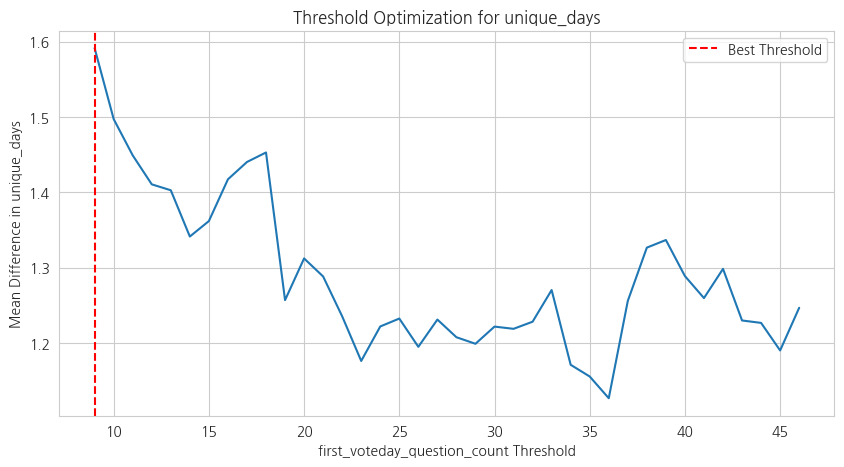

In [86]:
최소 = final_master_table['first_voteday_question_count'].min()
최대 = final_master_table['first_voteday_question_count'].max()
thresholds = np.arange(최소, 최대+1, 1)  # 임계값 후보들: 최소부터 최대까지 1단위 간격
min_group_size = 1000  # 너무 작은 그룹 제외
results = []

for thresh in thresholds:
    group0 = final_master_table[final_master_table['first_voteday_question_count'] < thresh]
    group1 = final_master_table[final_master_table['first_voteday_question_count'] >= thresh]
    
    size0 = group0.shape[0]
    size1 = group1.shape[0]
    
    if size0 >= min_group_size and size1 >= min_group_size:
        mean0 = group0['unique_days'].mean()
        mean1 = group1['unique_days'].mean()
        diff = abs(mean1 - mean0)

        results.append({
            'threshold': thresh,
            'mean_diff': diff,
            'size_group0': size0,
            'size_group1': size1,
            'mean_group0': mean0,
            'mean_group1': mean1
        })

# 결과를 데이터프레임으로 보기 좋게 출력
results_df = pd.DataFrame(results)
sorted_results = results_df.sort_values(by='mean_diff', ascending=False)

print("Top 5 threshold candidates:")
print(sorted_results.head(5))



plt.figure(figsize=(10,5))
plt.plot(results_df['threshold'], results_df['mean_diff'])
plt.axvline(sorted_results.iloc[0]['threshold'], color='r', linestyle='--', label='Best Threshold')
plt.xlabel('first_voteday_question_count Threshold')
plt.ylabel('Mean Difference in unique_days')
plt.title('Threshold Optimization for unique_days')
plt.legend()
plt.grid(True)
plt.show()



가장 큰 평균 차이를 만드는 최적 threshold: 2 (차이: 6.62)


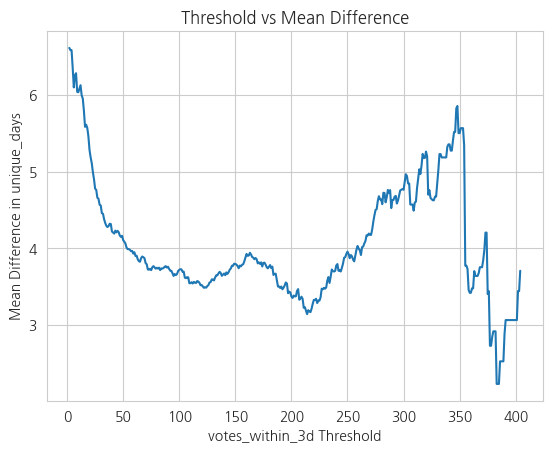

In [ ]:
최소 = final_master_table['votes_within_3d'].min()
최대 = final_master_table['votes_within_3d'].max()
thresholds = np.arange(최소, 최대+1, 1)  # 임계값 후보들: 최소부터 최대까지 1단위 간격
best_threshold = None
best_diff = 0
results = []

for thresh in thresholds:
    group0 = final_master_table[final_master_table['votes_within_3d'] < thresh]['unique_days']
    group1 = final_master_table[final_master_table['votes_within_3d'] >= thresh]['unique_days']
    
    if len(group0) > 10 and len(group1) > 10:  # 최소 샘플 수 확보
        mean_diff = abs(group0.mean() - group1.mean())
        results.append((thresh, mean_diff))
        
        if mean_diff > best_diff:
            best_diff = mean_diff
            best_threshold = thresh

print(f"가장 큰 평균 차이를 만드는 최적 threshold: {best_threshold} (차이: {best_diff:.2f})")


thresholds, diffs = zip(*results)
plt.plot(thresholds, diffs)
plt.xlabel('votes_within_3d Threshold')
plt.ylabel('Mean Difference in unique_days')
plt.title('Threshold vs Mean Difference')
plt.grid(True)
plt.show()


Top 5 threshold candidates:
   threshold  mean_diff  size_group0  size_group1  mean_group0  mean_group1
3         43   4.231471         1102         3601     7.242287    11.473757
5         45   4.229476         1153         3550     7.289679    11.519155
0         40   4.220287         1022         3681     7.179061    11.399348
6         46   4.211780         1169         3534     7.317365    11.529145
4         44   4.209436         1126         3577     7.280639    11.490075


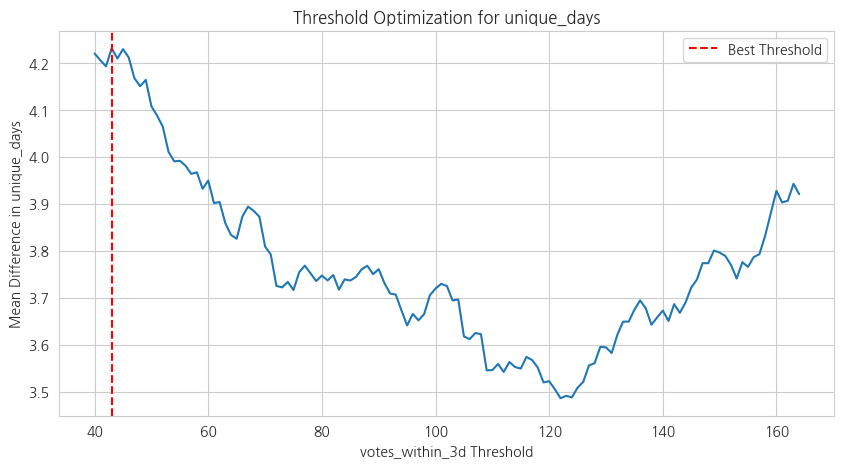

In [85]:
최소 = final_master_table['votes_within_3d'].min()
최대 = final_master_table['votes_within_3d'].max()
thresholds = np.arange(최소, 최대+1, 1)  # 임계값 후보들: 최소부터 최대까지 1단위 간격
min_group_size = 1000  # 너무 작은 그룹 제외
results = []

for thresh in thresholds:
    group0 = final_master_table[final_master_table['votes_within_3d'] < thresh]
    group1 = final_master_table[final_master_table['votes_within_3d'] >= thresh]
    
    size0 = group0.shape[0]
    size1 = group1.shape[0]
    
    if size0 >= min_group_size and size1 >= min_group_size:
        mean0 = group0['unique_days'].mean()
        mean1 = group1['unique_days'].mean()
        diff = abs(mean1 - mean0)

        results.append({
            'threshold': thresh,
            'mean_diff': diff,
            'size_group0': size0,
            'size_group1': size1,
            'mean_group0': mean0,
            'mean_group1': mean1
        })

# 결과를 데이터프레임으로 보기 좋게 출력
results_df = pd.DataFrame(results)
sorted_results = results_df.sort_values(by='mean_diff', ascending=False)

print("Top 5 threshold candidates:")
print(sorted_results.head(5))



plt.figure(figsize=(10,5))
plt.plot(results_df['threshold'], results_df['mean_diff'])
plt.axvline(sorted_results.iloc[0]['threshold'], color='r', linestyle='--', label='Best Threshold')
plt.xlabel('votes_within_3d Threshold')
plt.ylabel('Mean Difference in unique_days')
plt.title('Threshold Optimization for unique_days')
plt.legend()
plt.grid(True)
plt.show()



In [100]:
최소 = final_master_table['votes_within_3d'].min()
최대 = final_master_table['votes_within_3d'].max()
thresholds = np.arange(최소, 최대+1, 1)  # 임계값 후보들: 최소부터 최대까지 1단위 간격
means = []

for thresh in thresholds:
    subset = final_master_table[final_master_table['votes_within_3d'] == thresh]
    if subset.shape[0] >= 15:  # 최소 샘플 수 확보
        means.append(subset['unique_days'].mean())
    else:
        means.append(np.nan)

means_series = pd.Series(means)
slopes = means_series.diff()  # 인접한 평균 간의 차이

max_slope_idx = slopes.idxmax()
best_threshold = thresholds[max_slope_idx]

print(f"기울기가 가장 큰 지점의 threshold: {best_threshold}")

기울기가 가장 큰 지점의 threshold: 108


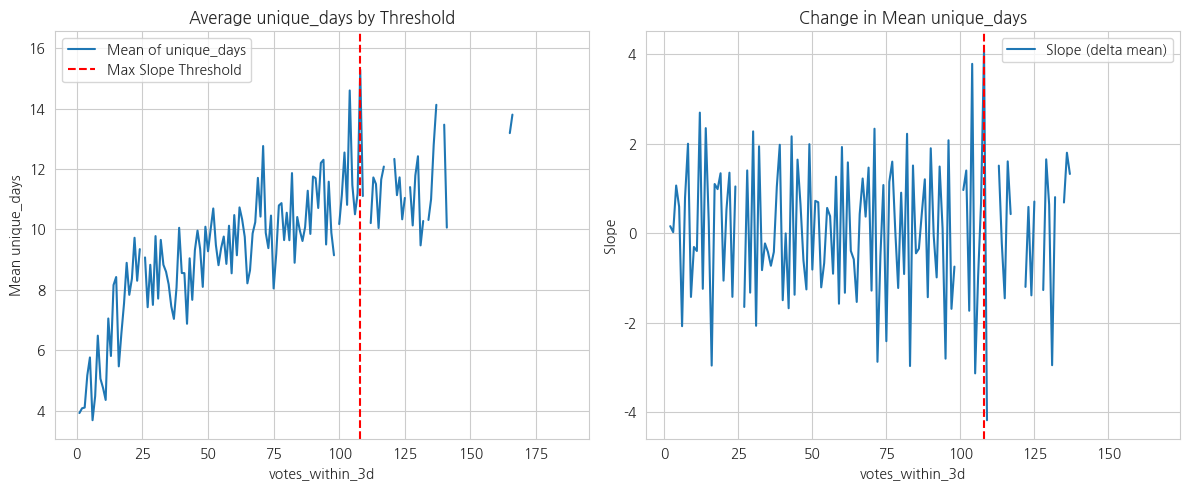

In [101]:
plt.figure(figsize=(12, 5))

# 평균 그래프
plt.subplot(1, 2, 1)
plt.plot(thresholds, means, label='Mean of unique_days')
plt.axvline(best_threshold, color='red', linestyle='--', label='Max Slope Threshold')
plt.xlabel('votes_within_3d')
plt.ylabel('Mean unique_days')
plt.title('Average unique_days by Threshold')
plt.legend()

# 기울기 그래프
plt.subplot(1, 2, 2)
plt.plot(thresholds, slopes, label='Slope (delta mean)')
plt.axvline(best_threshold, color='red', linestyle='--')
plt.xlabel('votes_within_3d')
plt.ylabel('Slope')
plt.title('Change in Mean unique_days')
plt.legend()

plt.tight_layout()
plt.show()


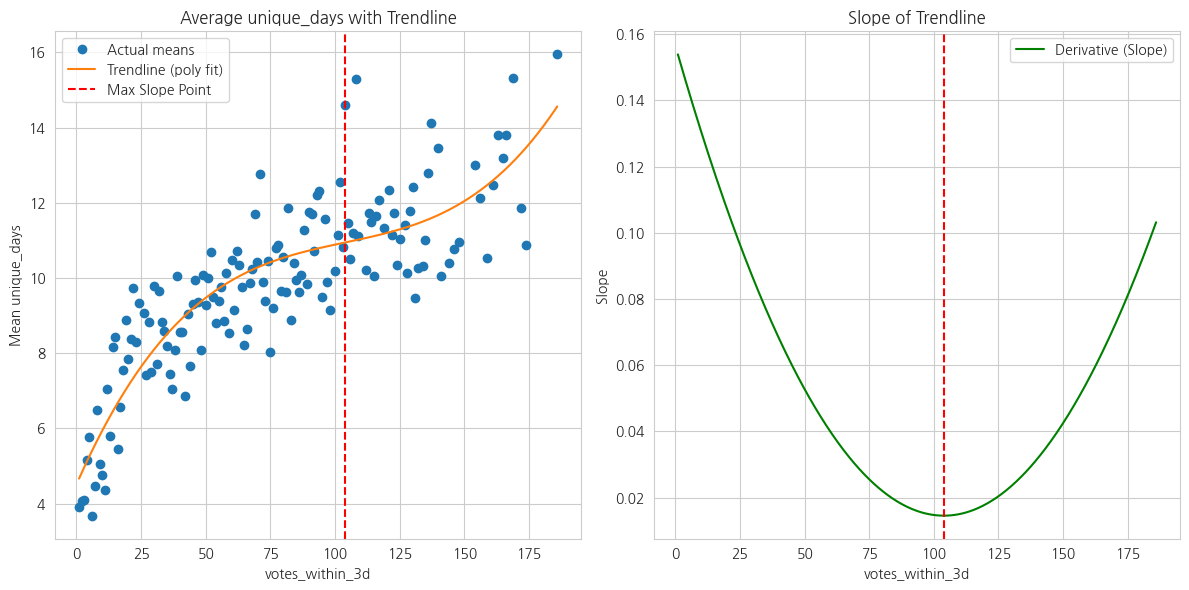

기울기 최대값 기준 최적 threshold: 104.07


In [106]:
# 유효한 값만 필터링 (nan 제외)
valid_mask = ~np.isnan(means)
x = np.array(thresholds)[valid_mask]
y = np.array(means)[valid_mask]

# 다항 회귀 (2차 또는 3차)
coeffs = np.polyfit(x, y, deg=3)  # degree 조정 가능
poly_func = np.poly1d(coeffs)

# 추세선
x_fit = np.linspace(min(x), max(x), 500)
y_fit = poly_func(x_fit)

# 기울기 함수 (미분)
slope_func = poly_func.deriv()
y_slope = slope_func(x_fit)

# 기울기 최대값 기준 threshold
max_slope_idx = np.argmax(y_slope)
min_slope_idx = np.argmin(y_slope)
best_threshold_by_slope = x_fit[min_slope_idx]


plt.figure(figsize=(12, 6))

# 평균 그래프 + 추세선
plt.subplot(1, 2, 1)
plt.plot(x, y, 'o', label='Actual means')
plt.plot(x_fit, y_fit, '-', label='Trendline (poly fit)')
plt.axvline(best_threshold_by_slope, color='red', linestyle='--', label='Max Slope Point')
plt.xlabel('votes_within_3d')
plt.ylabel('Mean unique_days')
plt.title('Average unique_days with Trendline')
plt.legend()

# 기울기 그래프
plt.subplot(1, 2, 2)
plt.plot(x_fit, y_slope, label='Derivative (Slope)', color='green')
plt.axvline(best_threshold_by_slope, color='red', linestyle='--')
plt.xlabel('votes_within_3d')
plt.ylabel('Slope')
plt.title('Slope of Trendline')
plt.legend()

plt.tight_layout()
plt.show()

print(f"기울기 최대값 기준 최적 threshold: {best_threshold_by_slope:.2f}")



In [ ]:
## Friend ~ Unique

In [107]:
final_master_table.columns

Index(['user_id', 'total_votes', 'unique_days', 'first_vote', 'last_vote',
       'active_days', 'cohort_day', 'retention_day8', 'gender', 'school_id',
       'grade', 'group_id', 'votes_within_3d', 'period_friend_count',
       'retention_group', 'address', 'student_count', 'school_type',
       'firstquestion_id', 'first_question_text', 'first_question_category',
       'chosen_count', 'day', 'first_voteday_question_count',
       '3days_vote_over100'],
      dtype='object')

Top 5 threshold candidates:
   threshold  mean_diff  size_group0  size_group1  mean_group0  mean_group1
0       23.0   3.480147         1018         3685     7.755403    11.235550
1       24.0   3.420037         1073         3630     7.842498    11.262534
2       25.0   3.348561         1143         3560     7.947507    11.296067
3       26.0   3.314698         1224         3479     8.030229    11.344927
4       27.0   3.205653         1309         3394     8.168831    11.374484


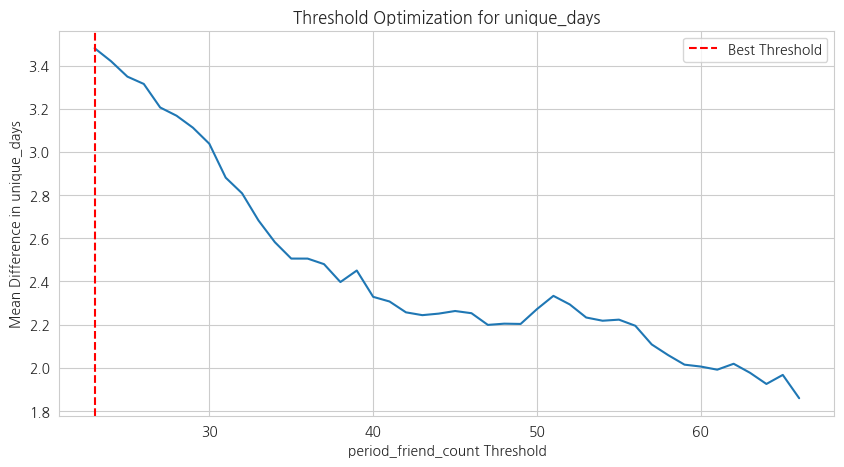

In [116]:
최소 = final_master_table['period_friend_count'].min()
최대 = final_master_table['period_friend_count'].max()
thresholds = np.arange(최소, 최대+1, 1)  # 임계값 후보들: 최소부터 최대까지 1단위 간격
min_group_size = 1000  # 너무 작은 그룹 제외
results = []

for thresh in thresholds:
    group0 = final_master_table[final_master_table['period_friend_count'] < thresh]
    group1 = final_master_table[final_master_table['period_friend_count'] >= thresh]
    
    size0 = group0.shape[0]
    size1 = group1.shape[0]
    
    if size0 >= min_group_size and size1 >= min_group_size:
        mean0 = group0['unique_days'].mean()
        mean1 = group1['unique_days'].mean()
        diff = abs(mean1 - mean0)

        results.append({
            'threshold': thresh,
            'mean_diff': diff,
            'size_group0': size0,
            'size_group1': size1,
            'mean_group0': mean0,
            'mean_group1': mean1
        })

# 결과를 데이터프레임으로 보기 좋게 출력
results_df = pd.DataFrame(results)
sorted_results = results_df.sort_values(by='mean_diff', ascending=False)

print("Top 5 threshold candidates:")
print(sorted_results.head(5))



plt.figure(figsize=(10,5))
plt.plot(results_df['threshold'], results_df['mean_diff'])
plt.axvline(sorted_results.iloc[0]['threshold'], color='r', linestyle='--', label='Best Threshold')
plt.xlabel('period_friend_count Threshold')
plt.ylabel('Mean Difference in unique_days')
plt.title('Threshold Optimization for unique_days')
plt.legend()
plt.grid(True)
plt.show()



In [124]:
최소 = final_master_table['period_friend_count'].min()
최대 = final_master_table['period_friend_count'].max()
thresholds = np.arange(최소, 최대+1, 1)  # 임계값 후보들: 최소부터 최대까지 1단위 간격
means = []

for thresh in thresholds:
    subset = final_master_table[final_master_table['period_friend_count'] == thresh]
    if subset.shape[0] >= 15:  # 최소 샘플 수 확보
        means.append(subset['unique_days'].mean())
    else:
        means.append(np.nan)

means_series = pd.Series(means)
slopes = means_series.diff()  # 인접한 평균 간의 차이

max_slope_idx = slopes.idxmax()
best_threshold = thresholds[max_slope_idx]

print(f"기울기가 가장 큰 지점의 threshold: {best_threshold}")

기울기가 가장 큰 지점의 threshold: 90.0


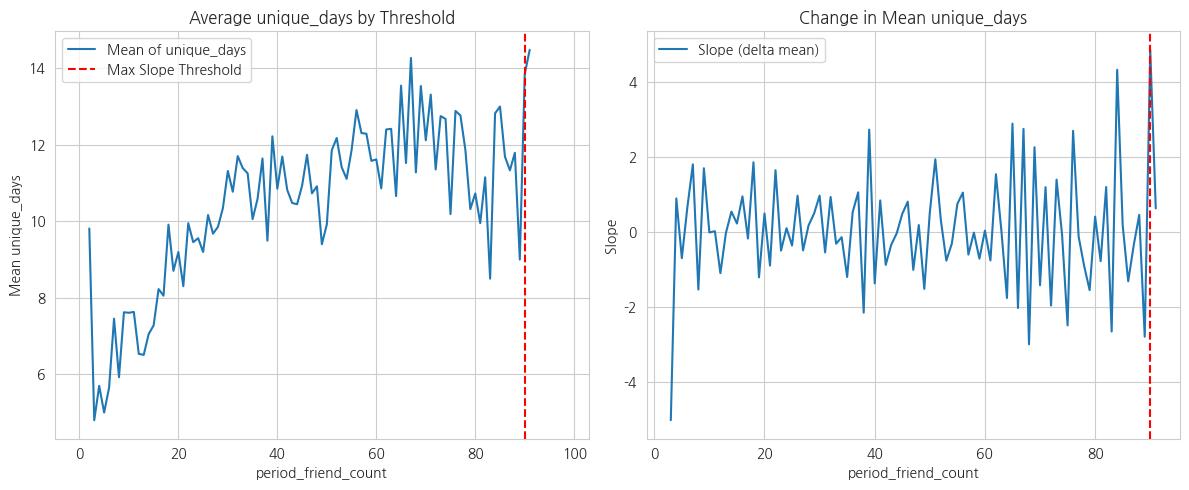

In [125]:
plt.figure(figsize=(12, 5))

# 평균 그래프
plt.subplot(1, 2, 1)
plt.plot(thresholds, means, label='Mean of unique_days')
plt.axvline(best_threshold, color='red', linestyle='--', label='Max Slope Threshold')
plt.xlabel('period_friend_count')
plt.ylabel('Mean unique_days')
plt.title('Average unique_days by Threshold')
plt.legend()

# 기울기 그래프
plt.subplot(1, 2, 2)
plt.plot(thresholds, slopes, label='Slope (delta mean)')
plt.axvline(best_threshold, color='red', linestyle='--')
plt.xlabel('period_friend_count')
plt.ylabel('Slope')
plt.title('Change in Mean unique_days')
plt.legend()

plt.tight_layout()
plt.show()


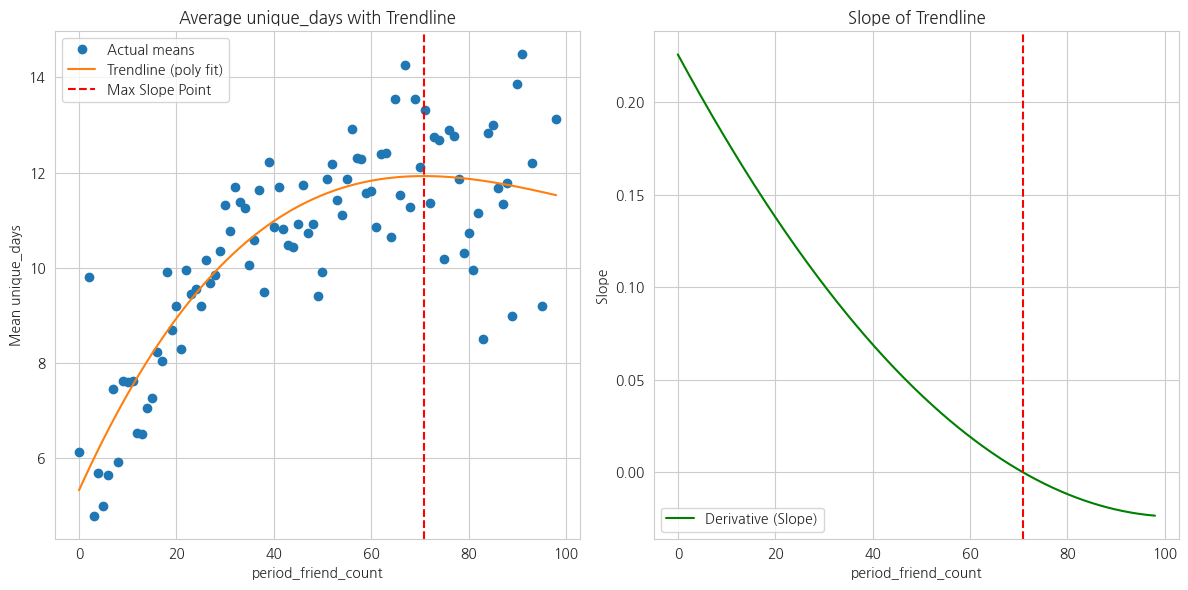

기울기 기준 최적 threshold: 70.80


In [126]:
# 유효한 값만 필터링 (nan 제외)
valid_mask = ~np.isnan(means)
x = np.array(thresholds)[valid_mask]
y = np.array(means)[valid_mask]

# 다항 회귀 (2차 또는 3차)
coeffs = np.polyfit(x, y, deg=3)  # degree 조정 가능
poly_func = np.poly1d(coeffs)

# 추세선
x_fit = np.linspace(min(x), max(x), 500)
y_fit = poly_func(x_fit)

# 기울기 함수 (미분)
slope_func = poly_func.deriv()
y_slope = slope_func(x_fit)

# 기울기 최대값 기준 threshold
max_slope_idx = np.argmax(y_slope)
min_slope_idx = np.argmin(y_slope)

# slope가 0에 가까운 첫 번째 지점 찾기
zero_slope_idx = np.where(np.isclose(y_slope, 0, atol=1e-3))[0]
if zero_slope_idx.size > 0:
    best_threshold_by_slope = np.mean(x_fit[zero_slope_idx])


plt.figure(figsize=(12, 6))

# 평균 그래프 + 추세선
plt.subplot(1, 2, 1)
plt.plot(x, y, 'o', label='Actual means')
plt.plot(x_fit, y_fit, '-', label='Trendline (poly fit)')
plt.axvline(best_threshold_by_slope, color='red', linestyle='--', label='Max Slope Point')
plt.xlabel('period_friend_count')
plt.ylabel('Mean unique_days')
plt.title('Average unique_days with Trendline')
plt.legend()

# 기울기 그래프
plt.subplot(1, 2, 2)
plt.plot(x_fit, y_slope, label='Derivative (Slope)', color='green')
plt.axvline(best_threshold_by_slope, color='red', linestyle='--')
plt.xlabel('period_friend_count')
plt.ylabel('Slope')
plt.title('Slope of Trendline')
plt.legend()

plt.tight_layout()
plt.show()

print(f"기울기 기준 최적 threshold: {best_threshold_by_slope:.2f}")



In [43]:
final_master_table.columns

Index(['user_id', 'total_votes', 'unique_days', 'first_vote', 'last_vote',
       'active_days', 'cohort_day', 'retention_day8', 'gender', 'school_id',
       'grade', 'group_id', 'votes_within_3d', 'period_friend_count',
       'retention_group', 'address', 'student_count', 'school_type',
       'firstquestion_id', 'first_question_text', 'first_question_category',
       'chosen_count', 'day', 'first_voteday_question_count'],
      dtype='object')

In [44]:
col = ['user_id','unique_days','chosen_count','period_friend_count','votes_within_3d','first_voteday_question_count']

In [45]:
a_top_25 = top_25[col].copy()
a_bottom_25 = bottom_25[col].copy()
a_top_25['chosen_per_day'] = a_top_25['chosen_count'] / a_top_25['unique_days']
a_bottom_25['chosen_per_day'] = a_bottom_25['chosen_count'] / a_bottom_25['unique_days']

In [46]:
print('top25')
for i in a_top_25.columns:
    try:
        print(i)
        print(a_top_25[i].mean())
    except:
        continue

print('\n\nbottom25')
for i in a_bottom_25.columns:
    try:
        print(i)
        print(a_bottom_25[i].mean())
    except:
        continue

top25
user_id
1082749.9717595945
unique_days
18.418537291817522
chosen_count
264.3461259956553
period_friend_count
52.02534395365677
votes_within_3d
135.183924692252
first_voteday_question_count
31.785662563359885
chosen_per_day
15.24363550849185


bottom25
user_id
1099127.6569555718
unique_days
4.152949745083758
chosen_count
165.55938416422288
period_friend_count
37.065549890750184
votes_within_3d
67.360524399126
first_voteday_question_count
25.219956300072834
chosen_per_day
45.515273704789834


In [25]:
a_bottom_25.chosen_per_day.mean()

45.515273704789834

In [26]:
a_top_25

,user_id,unique_days,chosen_count,period_friend_count,chosen_per_day
5,840473,21,195.0,14.0,9.285714
8,840685,21,256.0,69.0,12.190476
9,840902,14,201.0,60.0,14.357143
11,841576,13,293.0,73.0,22.538462
12,841809,17,567.0,105.0,33.352941
...,...,...,...,...,...
4677,1500126,14,22.0,27.0,1.571429
4684,1503200,17,124.0,34.0,7.294118
4692,1505477,14,56.0,72.0,4.000000
4695,1508709,15,322.0,50.0,21.466667


In [27]:
a_bottom_25

,user_id,unique_days,chosen_count,period_friend_count,chosen_per_day
0,838023,5,262.0,0.0,52.400000
2,838642,2,40.0,6.0,20.000000
6,840474,5,109.0,24.0,21.800000
15,844630,5,466.0,77.0,93.200000
23,849439,3,587.0,75.0,195.666667
...,...,...,...,...,...
4689,1504220,4,32.0,25.0,8.000000
4690,1505032,1,52.0,22.0,52.000000
4693,1506575,3,2.0,4.0,0.666667
4696,1509934,4,29.0,26.0,7.250000
